In [1]:
# Dataset
# https://www.kaggle.com/rounakbanik/the-movies-dataset#movies_metadata.csv

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.style.use('classic')

# Extra libraries to help condense data

# datetime library is used to get the year from the 'release_date' column 
from datetime import datetime

# Reads the genres column to get the first listed genre
import json

In [2]:
movies = pd.read_csv('movies_metadata.csv', low_memory=False).dropna()
movies = movies.set_index("id")
movies

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,,,
710,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,...,1995-11-16,3.521940e+08,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
10634,False,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.newline.com/properties/friday.html,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,14.56965,...,1995-04-26,2.821592e+07,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0
755,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,15.339153,...,1996-01-19,2.583662e+07,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0
5894,False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,"[{'id': 35, 'name': 'Comedy'}]",http://miramax.com/movie/blue-in-the-face/,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",11.528147,...,1995-09-15,1.275000e+06,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0
9070,False,"{'id': 286162, 'name': 'Power Rangers Collecti...",15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.powerrangers.com/,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,7.024227,...,1995-06-30,6.600000e+07,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0
2292,False,"{'id': 182813, 'name': 'Clerks Collection', 'p...",27000,"[{'id': 35, 'name': 'Comedy'}]",http://www.miramax.com/movie/clerks/,tt0109445,en,Clerks,Convenience and video store clerks Dante and R...,10.513367,...,1994-09-13,3.151130e+06,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because they serve you doesn't mean they ...,Clerks,False,7.4,769.0
11,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,42.149697,...,1977-05-25,7.753980e+08,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,False,8.1,6778.0
22586,False,"{'id': 144200, 'name': 'Swan Princess Series',...",35000000,"[{'id': 16, 'name': 'Animation'}]",http://www.sonypictures.com/movies/theswanprin...,tt0111333,en,The Swan Princess,The beautiful princess Odette is transformed i...,8.910462,...,1994-11-18,9.771658e+06,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An enchanting classic destined to capture your...,The Swan Princess,False,6.5,251.0
8587,False,"{'id': 94032, 'name': 'The Lion King Collectio...",45000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://movies.disney.com/the-lion-king,tt0110357,en,The Lion King,A young lion cub named Simba can't wait to be ...,21.605761,...,1994-06-23,7.882418e+08,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Life's greatest adventure is finding your plac...,The Lion King,False,8.0,5520.0


In [3]:
# Remove irrelevant columns

movies = movies[["budget", "title", "genres", "release_date", "revenue", "runtime", "vote_average", "vote_count"]]
movies.head()

,budget,title,genres,release_date,revenue,runtime,vote_average,vote_count
id,,,,,,,,
710,58000000,GoldenEye,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1995-11-16,352194034.0,130.0,6.6,1194.0
10634,3500000,Friday,"[{'id': 35, 'name': 'Comedy'}]",1995-04-26,28215918.0,91.0,7.0,513.0
755,19000000,From Dusk Till Dawn,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",1996-01-19,25836616.0,108.0,6.9,1644.0
5894,2000000,Blue in the Face,"[{'id': 35, 'name': 'Comedy'}]",1995-09-15,1275000.0,83.0,6.8,28.0
9070,15000000,Mighty Morphin Power Rangers: The Movie,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1995-06-30,66000000.0,92.0,5.2,153.0


In [4]:
# There are many rows that say 0 budget. That is bad data and we want to remove it.

movies = movies[movies.apply(lambda row: int(row['budget']) > 0, axis=1, result_type='reduce')]
movies.head()

,budget,title,genres,release_date,revenue,runtime,vote_average,vote_count
id,,,,,,,,
710,58000000,GoldenEye,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1995-11-16,352194034.0,130.0,6.6,1194.0
10634,3500000,Friday,"[{'id': 35, 'name': 'Comedy'}]",1995-04-26,28215918.0,91.0,7.0,513.0
755,19000000,From Dusk Till Dawn,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",1996-01-19,25836616.0,108.0,6.9,1644.0
5894,2000000,Blue in the Face,"[{'id': 35, 'name': 'Comedy'}]",1995-09-15,1275000.0,83.0,6.8,28.0
9070,15000000,Mighty Morphin Power Rangers: The Movie,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1995-06-30,66000000.0,92.0,5.2,153.0


In [5]:
# We do not care what month or day the movie came out, we just want the year
movies["release_date"] = movies["release_date"].apply(lambda date: datetime.strptime(date, "%m/%d/%y").year if "/" in date else datetime.strptime(date, "%Y-%m-%d").year)
movies = movies.rename(index=str,columns={"release_date": "year"}) # also rename the column to year

movies.head()

,budget,title,genres,year,revenue,runtime,vote_average,vote_count
id,,,,,,,,
710,58000000,GoldenEye,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1995,352194034.0,130.0,6.6,1194.0
10634,3500000,Friday,"[{'id': 35, 'name': 'Comedy'}]",1995,28215918.0,91.0,7.0,513.0
755,19000000,From Dusk Till Dawn,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",1996,25836616.0,108.0,6.9,1644.0
5894,2000000,Blue in the Face,"[{'id': 35, 'name': 'Comedy'}]",1995,1275000.0,83.0,6.8,28.0
9070,15000000,Mighty Morphin Power Rangers: The Movie,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1995,66000000.0,92.0,5.2,153.0


In [6]:
# Change the unit of budget and revenue from usd to usd (in millions). 

movies["budget"] = movies["budget"].apply(lambda budget: int(budget) / 1000000)
movies = movies.rename(index=str, columns = {"budget":"budget (in millions)"})

movies["revenue"] = movies["revenue"].apply(lambda revenue: int(revenue) / 1000000)
movies = movies.rename(index=str, columns = {"revenue": "revenue (in millions)"})

In [7]:
# Assuming that the first genre listed is the primary genre of the movie.

movies["genres"] = movies["genres"].apply(lambda genre: json.loads(genre.replace("'", '"'))[0]["name"])
movies = movies.rename(index=str, columns = {"genres" : "genre"})
movies.head()

,budget (in millions),title,genre,year,revenue (in millions),runtime,vote_average,vote_count
id,,,,,,,,
710,58.0,GoldenEye,Adventure,1995,352.194034,130.0,6.6,1194.0
10634,3.5,Friday,Comedy,1995,28.215918,91.0,7.0,513.0
755,19.0,From Dusk Till Dawn,Horror,1996,25.836616,108.0,6.9,1644.0
5894,2.0,Blue in the Face,Comedy,1995,1.275000,83.0,6.8,28.0
9070,15.0,Mighty Morphin Power Rangers: The Movie,Action,1995,66.000000,92.0,5.2,153.0


In [8]:
# were only going to look at the genres with the most amount of movies in our dataset

arrayGenres = ["Comedy", "Horror", "Drama", "Animation", "Adventure", "Action", "Fantasy", "Family", "Science Fiction"]
movies = movies.loc[movies["genre"].isin(arrayGenres)]

Text(0.5,1,'Number of Movies Per Genre')

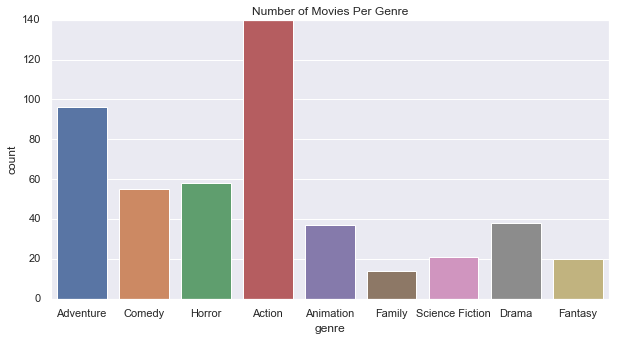

In [9]:
# Frequency chart to show how many movies each genre has in our data set.
# Which genres have the most amount of movies being made?

sns.set()

plt.figure(figsize=(10,5))
g = sns.countplot(x="genre", data=movies)
g.set_title("Number of Movies Per Genre")

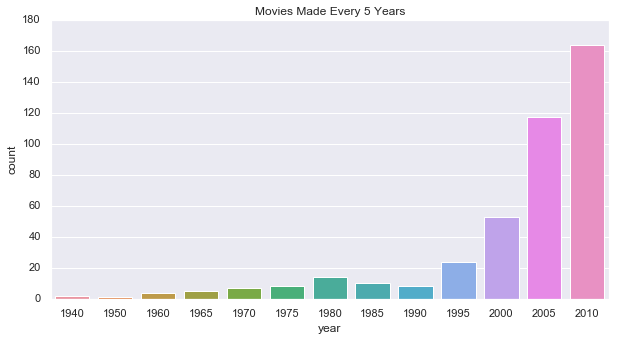

In [10]:
# Another frequency chart to show how many movies came out each year in our data set.
# How many movies come out a year? When has it change?

sns.set()

movies_decade = movies.copy()
movies_decade["year"] = movies_decade["year"].apply(lambda year: year - (year % 5))
movies_decade = movies_decade[movies_decade.apply(lambda row: int(row['year']) < 2015, axis=1, result_type='reduce')]
# Cut off at 2015, although there are movies in here past 2015, the 5 year span is not as complete as the rest of the years previous
# The movies go into 2017 and that probaly not even half of the movies being made between 2015-2019

plt.figure(figsize=(10,5))
g = sns.countplot(x = "year", data=movies_decade).set_title("Movies Made Every 5 Years")

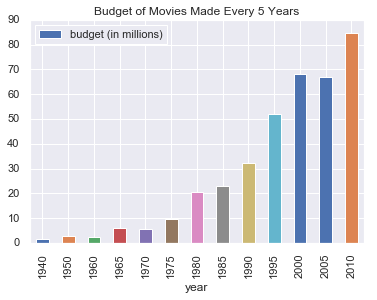

In [11]:
sns.set()

budget_per_movie = movies_decade.groupby("year").mean().reset_index()
budget_per_movie.plot.bar(x = "year", y = "budget (in millions)", title="Budget of Movies Made Every 5 Years")

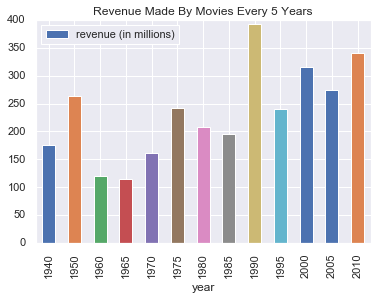

In [12]:
sns.set()

revenue_per_movie = movies_decade.groupby("year").mean().reset_index()
revenue_per_movie.plot.bar(x = "year", y = "revenue (in millions)", title="Revenue Made By Movies Every 5 Years")

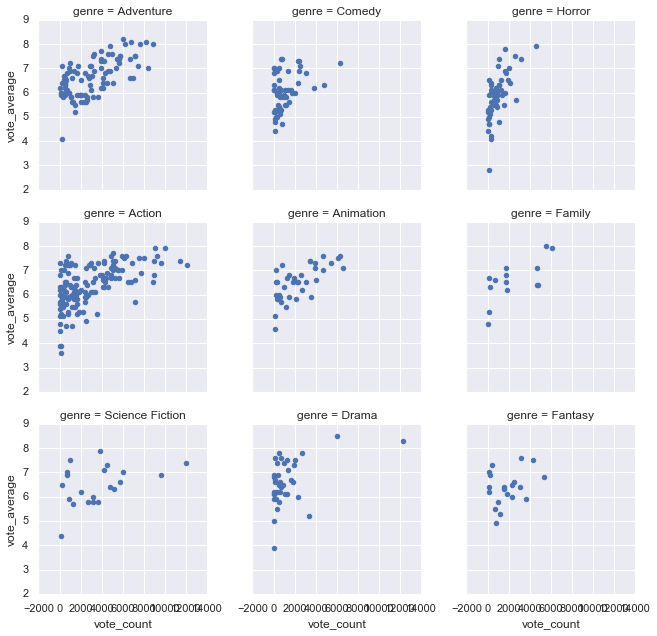

In [13]:
# Small multiple seperating each genre to look at the relation of number of votes and the average vote
# Do movies with a higher number of votes have a higher vote average?

sns.set()

g = sns.FacetGrid(movies, col="genre", col_wrap = 3)
g.map(plt.scatter, "vote_count", "vote_average")
g.add_legend()

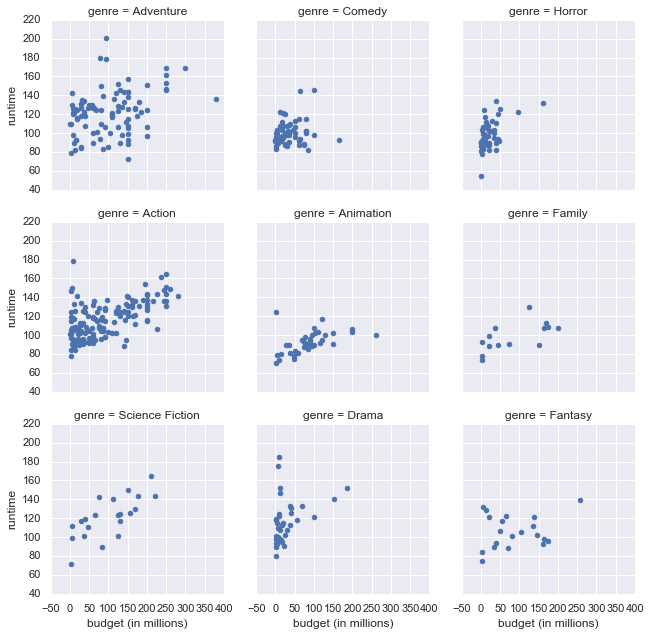

In [14]:
# Small multipe showing the relationship between budget and runtime per genre.
# Does the budget of a movie help cover larger production costs?

sns.set() 

g = sns.FacetGrid(movies, col="genre", col_wrap = 3)
g.map(plt.scatter, "budget (in millions)", "runtime")
g.add_legend()

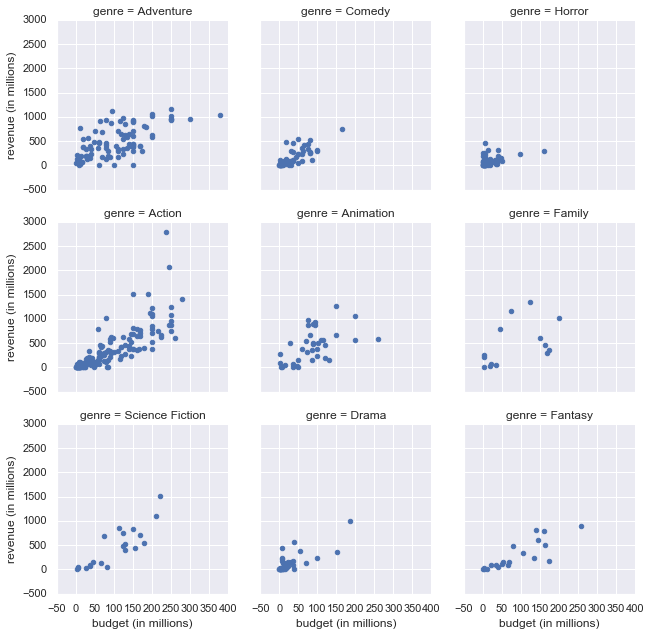

In [15]:
# Small multiple showing the relationship between budget and revenue for each genre
# Is there a positive correlation between budget and revenue?

sns.set()

g = sns.FacetGrid(movies, col="genre", col_wrap = 3)
g.map(plt.scatter, "budget (in millions)", "revenue (in millions)")
g.add_legend()

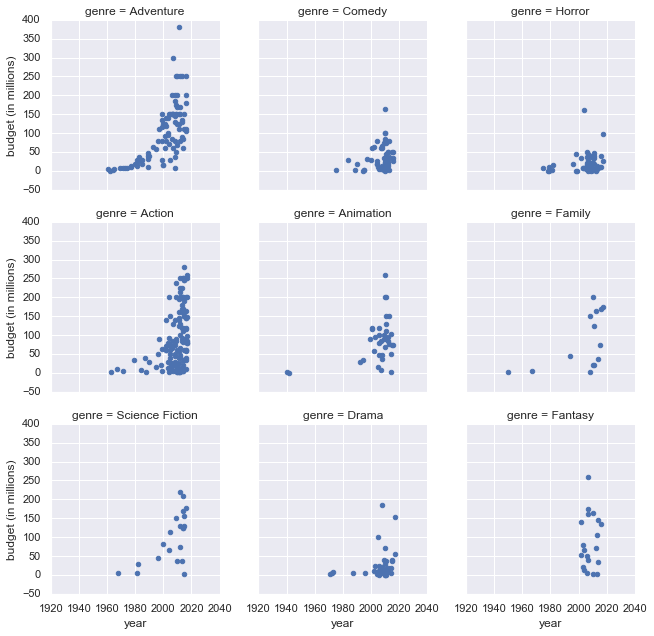

In [16]:
# Small multiple showing the relation between year and budget for each genre
# As more movies are coming out each year, to compete, are they getting higher budgets?

sns.set()

g = sns.FacetGrid(movies, col="genre", col_wrap = 3)
g.map(plt.scatter, "year", "budget (in millions)")
g.add_legend()

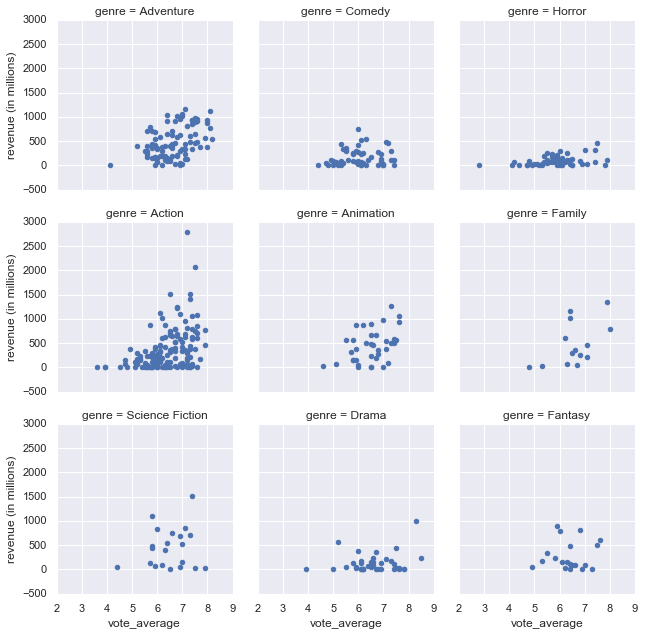

In [17]:
# Small multiple chart looking at the relation between vote average and revenue for each genre
# Is there a positive correlation between critics reviews and box office performance?

sns.set()

g = sns.FacetGrid(movies, col="genre", col_wrap = 3)
g.map(plt.scatter, "vote_average", "revenue (in millions)")
g.add_legend()